In [2]:
# Just run this code
import os.path
white = os.path.join('data', 'julio', 'winequality-white.csv')
red = os.path.join('data', 'julio', 'winequality-red.csv')

blancos = sc.textFile(white)
rojos = sc.textFile(red)


In [3]:
blancos.first()


u'"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'

In [4]:
blancos.take(2)

[u'"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"',
 u'7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6']

In [5]:
def no_es_la_primera_linea(string):
    if "fixed acidity" in string:
        return False
    else:
        return True

def casteo_eficiente(lista):
    for i in enumerate(lista):
        lista[i[0]] = float(lista[i[0]])
    return lista

In [6]:
blancos_sin_head_y_splitted = (blancos
                               .filter(no_es_la_primera_linea)
                               .map(lambda x: x.split(";"))
                               .map(casteo_eficiente)
                              )

rojos_sin_head_y_splitted = (rojos
                             .filter(no_es_la_primera_linea)
                             .map(lambda x: x.split(";"))
                             .map(casteo_eficiente)
                            )


In [7]:
blancos_sin_head_y_splitted.take(2)


[[7.0, 0.27, 0.36, 20.7, 0.045, 45.0, 170.0, 1.001, 3.0, 0.45, 8.8, 6.0],
 [6.3, 0.3, 0.34, 1.6, 0.049, 14.0, 132.0, 0.994, 3.3, 0.49, 9.5, 6.0]]

In [8]:
rojos_sin_head_y_splitted.take(2)


[[7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4, 5.0],
 [7.8, 0.88, 0.0, 2.6, 0.098, 25.0, 67.0, 0.9968, 3.2, 0.68, 9.8, 5.0]]

In [9]:
from pyspark.sql import SQLContext, HiveContext, Row
sqlCtx = HiveContext(sc)



In [10]:
blancos_tabulado = (blancos_sin_head_y_splitted
                    .map(lambda x: Row(fixed_acidity=x[0], 
                                     volatile_acidity=x[1],
                                     citric_acid=x[2],
                                     residual_sugar=x[3],
                                     chlorides=x[4],
                                     free_sulfur_dioxide=x[5],
                                     total_sulfur_dioxide=x[6],
                                     density=x[7],
                                     ph=x[8],
                                     sulphates=x[9],
                                     alcohol=x[10],
                                     quality=x[11],
                                    )
                        )
                    )



In [11]:
rojos_tabulado = (rojos_sin_head_y_splitted
                  .map(lambda x: Row(fixed_acidity=x[0], 
                                     volatile_acidity=x[1],
                                     citric_acid=x[2],
                                     residual_sugar=x[3],
                                     chlorides=x[4],
                                     free_sulfur_dioxide=x[5],
                                     total_sulfur_dioxide=x[6],
                                     density=x[7],
                                     ph=x[8],
                                     sulphates=x[9],
                                     alcohol=x[10],
                                     quality=x[11],
                                    )
                      )           
                 )



In [12]:
blancos_dataframe = sqlCtx.createDataFrame(blancos_tabulado)
rojos_dataframe = sqlCtx.createDataFrame(rojos_tabulado)


In [13]:
blancos_dataframe


DataFrame[alcohol: double, chlorides: double, citric_acid: double, density: double, fixed_acidity: double, free_sulfur_dioxide: double, ph: double, quality: double, residual_sugar: double, sulphates: double, total_sulfur_dioxide: double, volatile_acidity: double]

In [20]:
blancos_dataframe.variance

AttributeError: 'DataFrame' object has no attribute 'variance'

In [26]:
blancos_dataframe.registerTempTable("blancos")
rojos_dataframe.registerTempTable("rojos")


In [27]:
columnas = blancos_dataframe.columns
columnas


[u'alcohol',
 u'chlorides',
 u'citric_acid',
 u'density',
 u'fixed_acidity',
 u'free_sulfur_dioxide',
 u'ph',
 u'quality',
 u'residual_sugar',
 u'sulphates',
 u'total_sulfur_dioxide',
 u'volatile_acidity']

In [31]:
import pandas


sqlCtx.sql("""SELECT COUNT(*) as cuenta FROM blancos""").toPandas()


,cuenta
0,4898


In [32]:
import pandas
pandas.concat([sqlCtx.sql("""SELECT AVG(%s) as %s FROM blancos""" % (cadacolumna,cadacolumna)).toPandas() 
              for cadacolumna in columnas],
              axis=1)


,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,ph,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,10.514267,0.045772,0.334192,0.994027,6.854788,35.308085,3.188267,5.877909,6.391415,0.489847,138.360657,0.278241


In [33]:
pandas.concat([sqlCtx.sql("""SELECT MAX(%s) as %s FROM blancos""" % (cadacolumna,cadacolumna)).toPandas() 
              for cadacolumna in columnas],
              axis=1)


,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,ph,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,14.2,0.346,1.66,1.03898,14.2,289,3.82,9,65.8,1.08,440,1.1


In [37]:
pandas.concat([sqlCtx.sql("""SELECT MIN(%s) as %s FROM blancos""" % (cadacolumna,cadacolumna)).toPandas() 
              for cadacolumna in columnas],
              axis=1)


,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,ph,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,8,0.009,0,0.98711,3.8,2,2.72,3,0.6,0.22,9,0.08


In [38]:
pandas.concat([sqlCtx.sql("""SELECT STD(%s) as %s FROM blancos""" % (cadacolumna,cadacolumna)).toPandas() 
              for cadacolumna in columnas],
              axis=1)


,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,ph,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,1.230495,0.021846,0.121007,0.002991,0.843782,17.005401,0.150985,0.885548,5.07154,0.114114,42.493726,0.100784


In [40]:
dataset = blancos_sin_head_y_splitted.union(rojos_sin_head_y_splitted)


In [41]:
from pyspark.mllib.clustering import KMeans
nuestro_kmeans = KMeans.train(dataset, k=2, maxIterations=40, runs=20)
# Lo corremos 20 veces y Spark se queda con el de menor inercia


In [42]:
type(nuestro_kmeans)

pyspark.mllib.clustering.KMeansModel

In [45]:
help(nuestro_kmeans)

Help on KMeansModel in module pyspark.mllib.clustering object:

class KMeansModel(__builtin__.object)
 |  A clustering model derived from the k-means method.
 |  
 |  >>> data = array([0.0,0.0, 1.0,1.0, 9.0,8.0, 8.0,9.0]).reshape(4, 2)
 |  >>> model = KMeans.train(
 |  ...     sc.parallelize(data), 2, maxIterations=10, runs=30, initializationMode="random")
 |  >>> model.predict(array([0.0, 0.0])) == model.predict(array([1.0, 1.0]))
 |  True
 |  >>> model.predict(array([8.0, 9.0])) == model.predict(array([9.0, 8.0]))
 |  True
 |  >>> model = KMeans.train(sc.parallelize(data), 2)
 |  >>> sparse_data = [
 |  ...     SparseVector(3, {1: 1.0}),
 |  ...     SparseVector(3, {1: 1.1}),
 |  ...     SparseVector(3, {2: 1.0}),
 |  ...     SparseVector(3, {2: 1.1})
 |  ... ]
 |  >>> model = KMeans.train(sc.parallelize(sparse_data), 2, initializationMode="k-means||")
 |  >>> model.predict(array([0., 1., 0.])) == model.predict(array([0, 1.1, 0.]))
 |  True
 |  >>> model.predict(array([0., 0., 1.])) 

In [44]:
from pyspark.mllib.regression import LabeledPoint
from numpy import array, concatenate

dataset_con_labels = dataset.map(lambda x: LabeledPoint(nuestro_kmeans.predict(x),x))


In [46]:
dataset_con_labels.take(4)


[LabeledPoint(0.0, [7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6.0]),
 LabeledPoint(0.0, [6.3,0.3,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6.0]),
 LabeledPoint(1.0, [8.1,0.28,0.4,6.9,0.05,30.0,97.0,0.9951,3.26,0.44,10.1,6.0]),
 LabeledPoint(0.0, [7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.4,9.9,6.0])]

In [47]:
dataset_plano = dataset_con_labels.map(lambda x: concatenate((array([x.label]),x.features.toArray())))
dataset_plano.take(4)


[array([  0.00000000e+00,   7.00000000e+00,   2.70000000e-01,
          3.60000000e-01,   2.07000000e+01,   4.50000000e-02,
          4.50000000e+01,   1.70000000e+02,   1.00100000e+00,
          3.00000000e+00,   4.50000000e-01,   8.80000000e+00,
          6.00000000e+00]),
 array([  0.00000000e+00,   6.30000000e+00,   3.00000000e-01,
          3.40000000e-01,   1.60000000e+00,   4.90000000e-02,
          1.40000000e+01,   1.32000000e+02,   9.94000000e-01,
          3.30000000e+00,   4.90000000e-01,   9.50000000e+00,
          6.00000000e+00]),
 array([  1.00000000e+00,   8.10000000e+00,   2.80000000e-01,
          4.00000000e-01,   6.90000000e+00,   5.00000000e-02,
          3.00000000e+01,   9.70000000e+01,   9.95100000e-01,
          3.26000000e+00,   4.40000000e-01,   1.01000000e+01,
          6.00000000e+00]),
 array([  0.00000000e+00,   7.20000000e+00,   2.30000000e-01,
          3.20000000e-01,   8.50000000e+00,   5.80000000e-02,
          4.70000000e+01,   1.86000000e+02,   9.

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas import DataFrame as pandas_DataFrame
df = pandas_DataFrame(dataset_plano.collect())
df.columns=["cluster",
            "fixed acidity",
            "volatile acidity",
            "citric acid",
            "residual sugar",
            "chlorides",
            "free sulfur dioxide",
            "total sulfur dioxide",
            "density",
            "pH",
            "sulphates",
            "alcohol",
            "quality"]


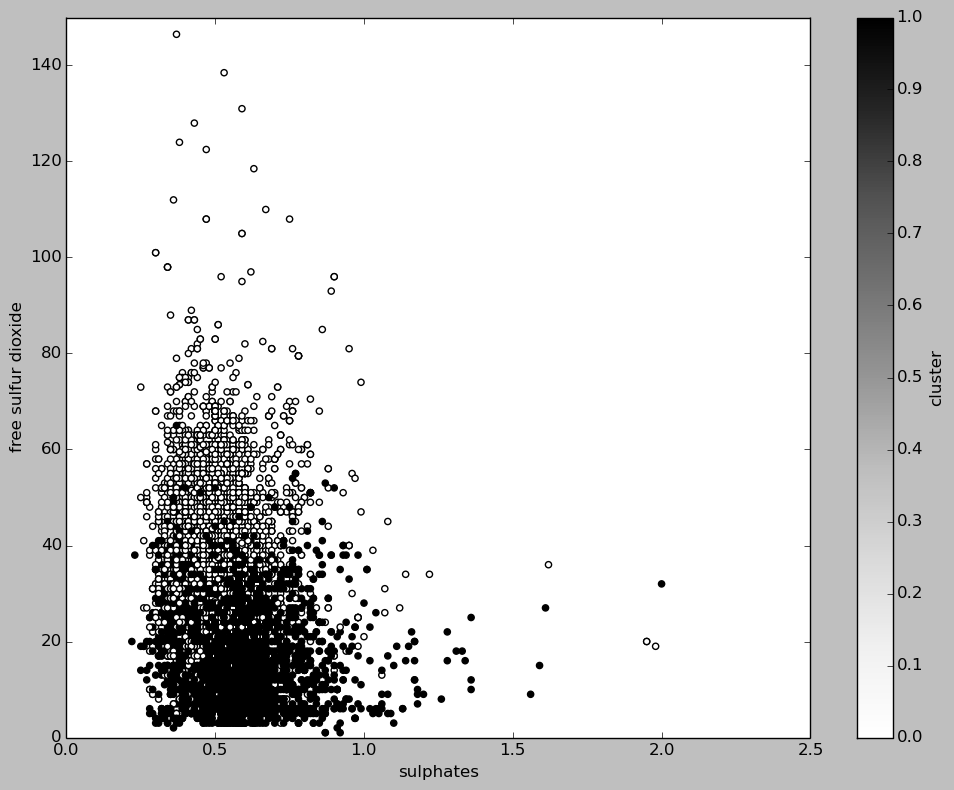

In [49]:
df.plot(kind="scatter",x="sulphates",y="free sulfur dioxide",c="cluster",figsize=(12,9),ylim=(0,150))
pass


In [50]:
blancos_labeled = (blancos_sin_head_y_splitted
                  .map(lambda x: LabeledPoint(0,x)))

rojos_labeled = (rojos_sin_head_y_splitted
                .map(lambda x: LabeledPoint(1,x)))

todos_labeled = blancos_labeled.union(rojos_labeled)


In [51]:
training_set, testing_set = todos_labeled.randomSplit([70,30])

training_set.cache()
testing_set.cache()


PythonRDD[534] at RDD at PythonRDD.scala:43

In [52]:
from pyspark.mllib.classification import LogisticRegressionWithSGD

logistica1 = LogisticRegressionWithSGD.train(training_set,
                                            step = 0.5,
                                            initialWeights=None,
                                            iterations=100,
                                            regType=None,
                                            intercept=True)

logistica2 = LogisticRegressionWithSGD.train(training_set,
                                            step = 1.0,
                                            initialWeights=None,
                                            iterations=100,
                                            regType=None,
                                            intercept=True)

logistica3 = LogisticRegressionWithSGD.train(training_set,
                                            step = 3.0,
                                            initialWeights=None,
                                            iterations=80,
                                            regType=None,
                                            intercept=True)


In [53]:
l1_1 = LogisticRegressionWithSGD.train(training_set,
                                       step = 0.5,
                                       initialWeights=None,
                                       iterations=100,
                                       regType="l1",
                                       regParam=0.01,
                                       intercept=True)

l1_2 = LogisticRegressionWithSGD.train(training_set,
                                       step = 1.0,
                                       initialWeights=None,
                                       iterations=100,
                                       regType="l1",
                                       regParam=0.05,
                                       intercept=True)

l1_3 = LogisticRegressionWithSGD.train(training_set,
                                       step = 0.8,
                                       initialWeights=None,
                                       iterations=120,
                                       regType="l1",
                                       regParam=0.03,
                                       intercept=True)


In [54]:
l2_1 = LogisticRegressionWithSGD.train(training_set,
                                       step = 1.0,
                                       initialWeights=None,
                                       iterations=120,
                                       regType="l2",
                                       regParam=0.01,
                                       intercept=True)

l2_2 = LogisticRegressionWithSGD.train(training_set,
                                       step = 0.5,
                                       initialWeights=None,
                                       iterations=100,
                                       regType="l2",
                                       regParam=0.05,
                                       intercept=True)

l2_3 = LogisticRegressionWithSGD.train(training_set,
                                       step = 2,
                                       initialWeights=None,
                                       iterations=120,
                                       regType="l2",
                                       regParam=0.2,
                                       intercept=True)


In [55]:
from pyspark.mllib.classification import SVMWithSGD

svm1 = SVMWithSGD.train(training_set,
                        step=1.0,
                        iterations=80,
                        regType=None,
                        intercept=True)

svm2 = SVMWithSGD.train(training_set,
                        step=1.0,
                        iterations=150,
                        regType="l1",
                        intercept=True)

svm3 = SVMWithSGD.train(training_set,
                        step=3.0,
                        iterations=80,
                        regType="l2",
                        intercept=True)


In [56]:
pool_de_modelos = [(logistica1, "logistica1"),
                  (logistica2, "logistica2"),
                  (logistica3, "logistica3"),
                  (l1_1, "l1_1"),
                  (l1_2, "l1_2"),
                  (l1_3, "l1_3"),
                  (l2_1, "l2_1"),
                  (l2_2, "l2_2"),
                  (l2_3, "l2_3"),
                  (svm1, "svm1"),
                  (svm2, "svm2"),
                  (svm3, "svm3")
                  ]


In [57]:
mejor_modelo = ("nombre_del_modelo", float("inf"), "weights")

for modelo in pool_de_modelos:
    testing_set_predicted_vs_real = (testing_set
                                     .map(lambda x: [x.label, modelo[0].predict(x.features)])
                                     .map(lambda x: 1 if abs(x[0]-x[1])>=0.05 else 0)
                                    )
    numero_de_mal_clasificados = float(testing_set_predicted_vs_real.sum())
    misclassification_error = numero_de_mal_clasificados / testing_set.count()
    if misclassification_error < mejor_modelo[1]:
        mejor_modelo = (modelo[1], misclassification_error, modelo[0])


In [58]:
mejor_modelo


('l2_2',
 0.06894816305988928,
 (weights=[2.54555220582,0.255052282232,0.0400883830495,-0.146560106847,0.0440740398947,0.0770295239861,-0.850972797277,0.237631805693,0.846271010349,0.244958844651,1.98909847703,1.06944947184], intercept=0.8634894636453518))